In [2]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


from fastai.vision import *

base_path = 'data'
path = Path(base_path+ '/items')
print(path.ls())


classes = ['guns','teddys']

np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

[PosixPath('data/items/teddys'), PosixPath('data/items/guns')]


epoch,train_loss,valid_loss,error_rate,time
0,1.160316,1.439571,0.368421,00:38
1,0.647068,0.096647,0.026316,00:35
2,0.424048,0.054718,0.026316,00:29
3,0.313060,0.061937,0.026316,00:34


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


epoch,train_loss,valid_loss,error_rate,time
0,0.042206,0.054339,0.026316,00:48


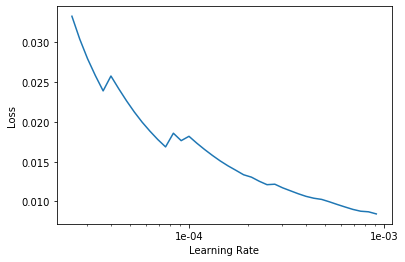

In [3]:
# In[3]:


learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle(4)
learn.unfreeze()
learn.lr_find(start_lr=1e-5, end_lr=1e-1)
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()
learn.fit_one_cycle(1, max_lr=3e-5)

learn.save('stage-2')

In [5]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)
learn.fit_one_cycle()
learn.unfreeze()
learn.lr_find()
# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.fit_one_cycle(1, max_lr=slice(3e-5,3e-4))

learn.save('cm_model')

TypeError: fit_one_cycle() missing 1 required positional argument: 'cyc_len'

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

learn.export()

print("Model exported after training")